In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [ ]:
directory = "/content/drive/MyDrive/chest_xray/train"
filepath =[]
label = []
folds = os.listdir(directory)
for fold in folds:
    f_path = os.path.join(directory , fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [ ]:
df_train

,filepath,label
0,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA
1,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA
2,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA
3,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA
4,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA
...,...,...
5212,/content/drive/MyDrive/chest_xray/train/NORMAL...,NORMAL
5213,/content/drive/MyDrive/chest_xray/train/NORMAL...,NORMAL
5214,/content/drive/MyDrive/chest_xray/train/NORMAL...,NORMAL
5215,/content/drive/MyDrive/chest_xray/train/NORMAL...,NORMAL


In [ ]:
df_train.label.value_counts()

PNEUMONIA    3875
NORMAL       1342
Name: label, dtype: int64

In [ ]:
directory = "/content/drive/MyDrive/chest_xray/test"
filepath =[]
label = []
folds = os.listdir(directory)
for fold in folds:
    f_path = os.path.join(directory , fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [ ]:
df_test

,filepath,label
0,/content/drive/MyDrive/chest_xray/test/NORMAL/...,NORMAL
1,/content/drive/MyDrive/chest_xray/test/NORMAL/...,NORMAL
2,/content/drive/MyDrive/chest_xray/test/NORMAL/...,NORMAL
3,/content/drive/MyDrive/chest_xray/test/NORMAL/...,NORMAL
4,/content/drive/MyDrive/chest_xray/test/NORMAL/...,NORMAL
...,...,...
619,/content/drive/MyDrive/chest_xray/test/PNEUMON...,PNEUMONIA
620,/content/drive/MyDrive/chest_xray/test/PNEUMON...,PNEUMONIA
621,/content/drive/MyDrive/chest_xray/test/PNEUMON...,PNEUMONIA
622,/content/drive/MyDrive/chest_xray/test/PNEUMON...,PNEUMONIA


In [ ]:
df_test.label.value_counts()

PNEUMONIA    390
NORMAL       234
Name: label, dtype: int64

In [ ]:
data_dir = '/content/drive/MyDrive/chest_xray/train'
test_dir = '/content/drive/MyDrive/chest_xray/test'
IMAGE_SIZE = (256,256)
print('Training Images:')
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

Training Images:
Found 5217 files belonging to 2 classes.
Using 4696 files for training.
Validation Images:
Found 5217 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


In [ ]:
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names
class_labels = ['NORMAL', 'PNEUMONIA']
label_encoder = LabelEncoder()
label_encoder.fit(class_labels)
train_labels_encoded = label_encoder.transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [ ]:
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


In [ ]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

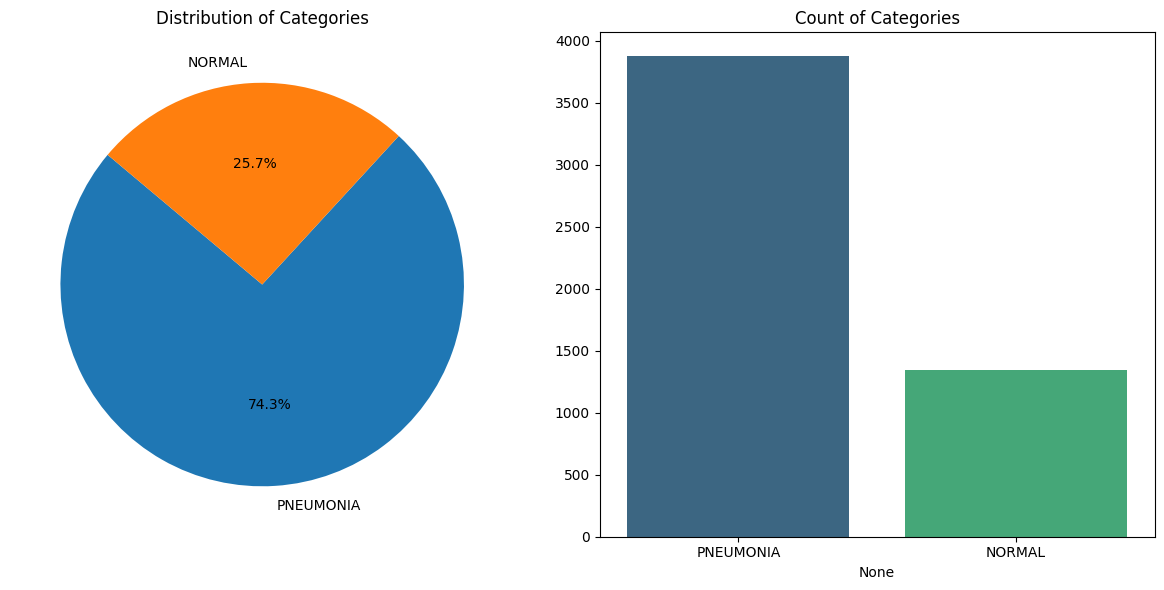

In [ ]:
count = df_train['label'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')
plt.tight_layout()
plt.show()

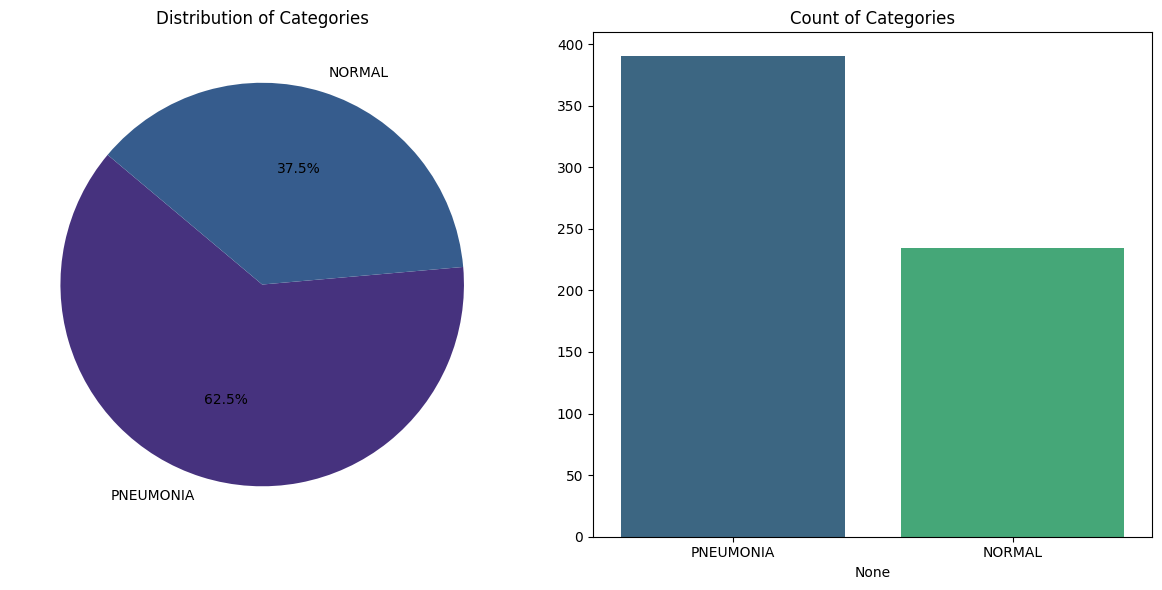

In [ ]:
count = df_test['label'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')
plt.tight_layout()
plt.show()

In [ ]:
def visualize_images(path, num_images=5):
    image_filenames = os.listdir(path)
    num_images = min(num_images, len(image_filenames))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')
    for i, image_filename in enumerate(image_filenames[:num_images]):
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)
    plt.tight_layout()
    plt.show()

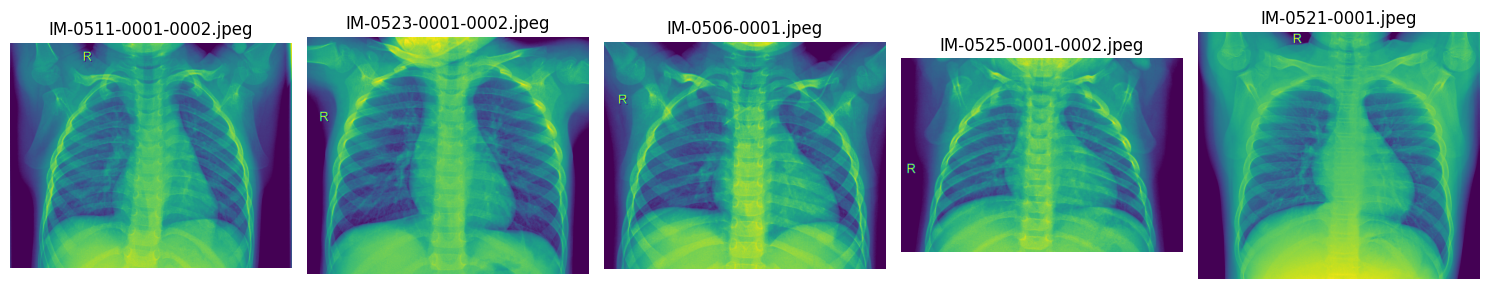

In [ ]:
path_to_visualize = "/content/drive/MyDrive/chest_xray/train/NORMAL"
visualize_images(path_to_visualize, num_images=5)

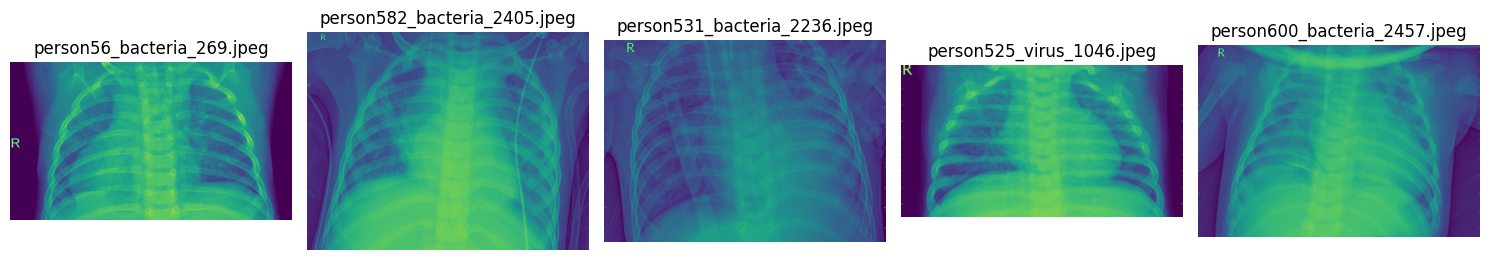

In [ ]:
path_to_visualize = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
visualize_images(path_to_visualize, num_images=5)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))
base_model.trainable = False
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(220, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 batch_normalization_6 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 220)               281820    
                                                                 
 dropout_5 (Dropout)         (None, 220)               0         
                                                         

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit_generator(train_ds,
                        epochs= 20,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/20
147/147 [==============================] - 256s 2s/step - loss: 0.1798 - accuracy: 0.9248 - val_loss: 0.1198 - val_accuracy: 0.9616
Epoch 2/20
147/147 [==============================] - 48s 313ms/step - loss: 0.1115 - accuracy: 0.9593 - val_loss: 0.0870 - val_accuracy: 0.9597
Epoch 3/20
147/147 [==============================] - 50s 326ms/step - loss: 0.0965 - accuracy: 0.9623 - val_loss: 0.0759 - val_accuracy: 0.9674
Epoch 4/20
147/147 [==============================] - 50s 322ms/step - loss: 0.0864 - accuracy: 0.9668 - val_loss: 0.0687 - val_accuracy: 0.9616
Epoch 5/20
147/147 [==============================] - 53s 350ms/step - loss: 0.0728 - accuracy: 0.9738 - val_loss: 0.0656 - val_accuracy: 0.9693
Epoch 6/20
147/147 [==============================] - 50s 314ms/step - loss: 0.0673 - accuracy: 0.9744 - val_loss: 0.0640 - val_accuracy: 0.9693
Epoch 7/20
147/147 [==============================] - 48s 316ms/step - loss: 0.0676 - accuracy: 0.9751 - val_loss: 0.0576 - val_accu

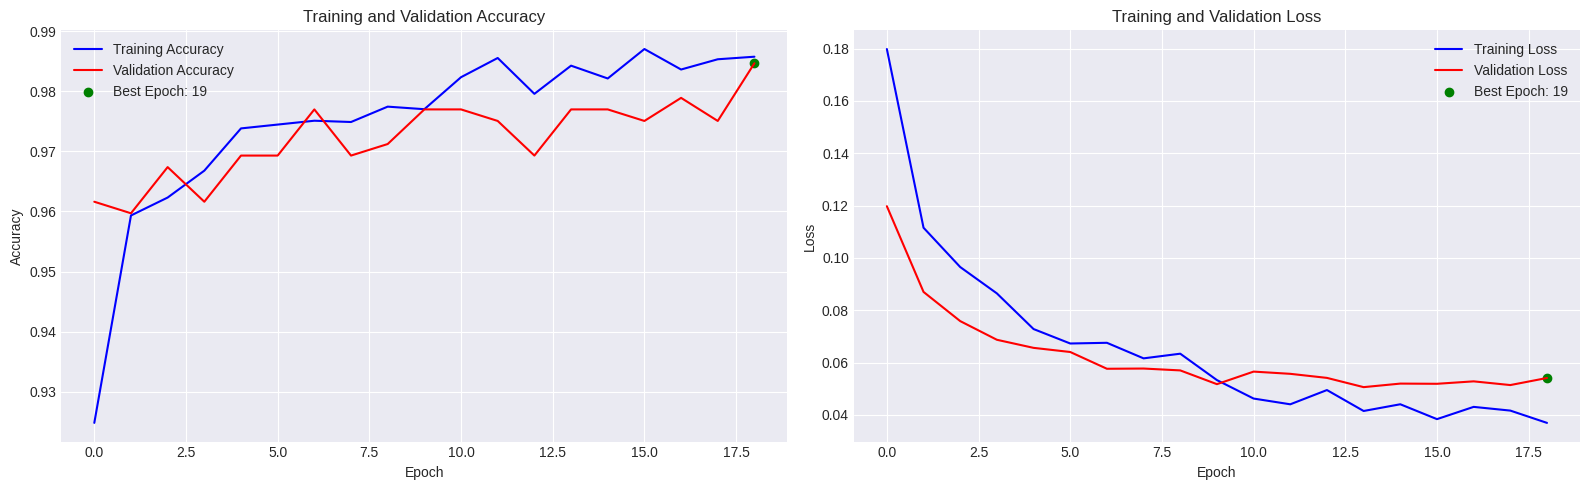

In [ ]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
plt.style.use('seaborn-darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()
plt.tight_layout()
plt.show()

Testing Images:
Found 624 files belonging to 2 classes.
Testing Images:
20/20 [==============================] - 75s 2s/step


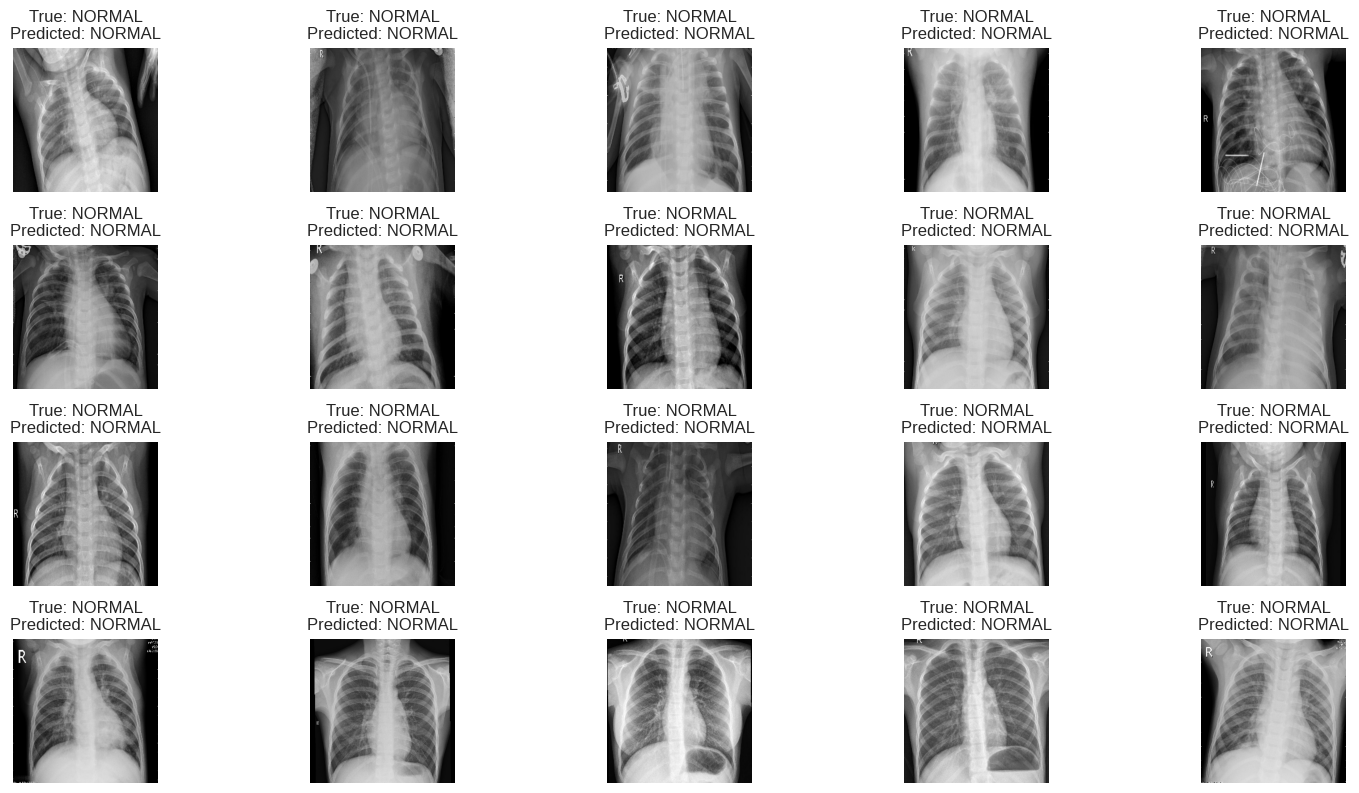

In [ ]:
test_dir = '/content/drive/MyDrive/chest_xray/test/'
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)
def plot_images_with_predictions(model, dataset, class_labels, num_images=40, num_images_per_row=5):
    predictions = model.predict(dataset)
    dataset_shuffled = dataset.shuffle(buffer_size=len(dataset))
    plt.figure(figsize=(15, 10))
    for i, (images, labels) in enumerate(dataset_shuffled.take(num_images))
        images = images.numpy()
        for j in range(len(images)):
            if i * num_images_per_row + j < num_images:
                predicted_class = class_labels[np.argmax(predictions[i * num_images_per_row + j])]
                true_class = class_labels[np.argmax(labels[j])]
                plt.subplot(num_images // num_images_per_row + 1, num_images_per_row, i * num_images_per_row + j + 1)
                plt.imshow(images[j].astype("uint8"))
                plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
                plt.axis('off')
    plt.tight_layout()
    plt.show()
print('Testing Images:')
plot_images_with_predictions(model, test_ds, class_labels, num_images=20)

1/1 [==============================] - 0s 49ms/step


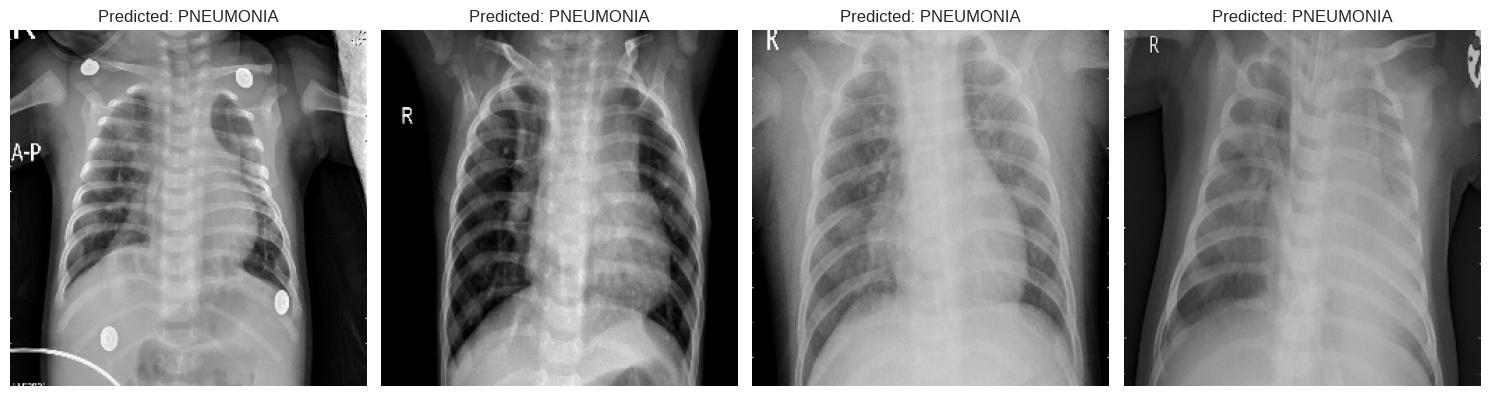

In [ ]:
directory_path = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/'
image_files = os.listdir(directory_path)[:4]
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))
    img_array = img.astype(np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')
plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open("mn_full_model.pkl", "wb") as f:
    pickle.dump(model, f)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("mn_my_model.tflite", "wb") as f:
    f.write(tflite_model)

In [ ]:
with open("mn_full_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [ ]:
interpreter = tf.lite.Interpreter(model_path="mn_my_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
img_path = '/content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'
img = cv2.imread(img_path)
img = cv2.resize(img, (256, 256))
img_array = img.astype(np.float32) / 255.0
img_array = np.expand_dims(img_array, axis=0)
sample_input = img_array
full_model_prediction = loaded_model.predict(sample_input)
interpreter.set_tensor(input_details[0]['index'], sample_input)
interpreter.invoke()
tflite_model_prediction = interpreter.get_tensor(output_details[0]['index'])
print("Full Model Prediction:", full_model_prediction)
print("TFLite Model Prediction:", tflite_model_prediction)


1/1 [==============================] - 0s 35ms/step
Full Model Prediction: [[0.20724948]]
TFLite Model Prediction: [[0.20723946]]
